# Predicting Housing Prices in Hyderabad

## Univariate Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
house_df=pd.read_csv("Hyderabad.csv")

In [3]:
house_df.shape

(2518, 40)

In [4]:
house_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
house_df.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [6]:
corr=house_df.corr().loc['Price']
corr.nlargest(2)

Price    1.00000
Area     0.82931
Name: Price, dtype: float64

##### As it is univarient linear regression let us consider the feature with highest co-relation with price i.e Area

In [7]:
X=house_df[['Area']]
y=house_df['Price']

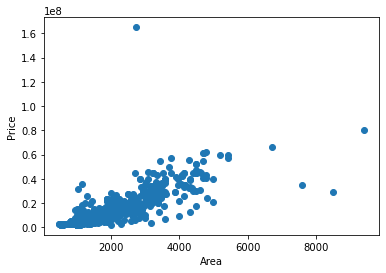

In [8]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(X,y)

#### Splitting the data into training and testing sets

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

#### Training the model with training datset

In [10]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [11]:
X_train.shape

(1762, 1)

#### Predicting the housing prices based on the test area inputs i.e X_test

In [12]:
prediction=reg.predict(X_test)

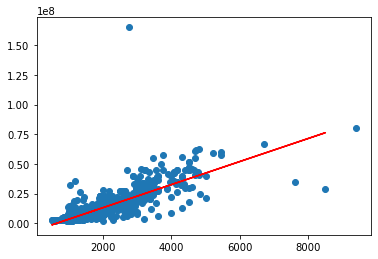

In [13]:
plt.scatter(X,y)
plt.plot(X_test,prediction,color="red")

#### Evaluation metrics like Mean squared error and r2 score to find out the model performance

In [14]:
mse = mean_squared_error(y_test, prediction)
r_score=r2_score(y_test, prediction)
print('Mean Squared Error',mse)
print('r2 score',r_score)

Mean Squared Error 18569399688141.562
r2 score 0.7465411151361682


#### Finding the slope and intercept of the hypothesis

In [15]:
m=reg.coef_[0]
c=reg.intercept_

### Try it

In [16]:
#remove quotes
'''
area=int(input("Enter the area "))
price=m*(area)+c
print("PRICE=",int(price))'''

'\narea=int(input("Enter the area "))\nprice=m*(area)+c\nprint("PRICE=",int(price))'

## Multivariate Linear Regression

## Feature Selection

In [29]:
corr.nlargest(6)

Price              1.000000
Area               0.829310
No. of Bedrooms    0.614283
Resale             0.203878
SwimmingPool       0.076059
Gymnasium          0.068763
Name: Price, dtype: float64

#### Let us select the features with top 5 scores

In [18]:
X2=house_df[['Area','No. of Bedrooms','Resale','SwimmingPool','Gymnasium']]
y2=house_df['Price']

In [19]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=101)

In [20]:
reg2=linear_model.LinearRegression()
reg2.fit(X2_train,y2_train)

LinearRegression()

In [21]:
prediction2=reg2.predict(X2_test)

In [22]:
mse2 = mean_squared_error(y2_test, prediction2)
r2_score=r2_score(y2_test, prediction2)
print('Mean Squared Error',mse2)
print('r2 score',r2_score)

Mean Squared Error 18619302596358.848
r2 score 0.7458599765059144


#### Finding the coefficients and intercept of the hypothesis

In [23]:
f1=reg2.coef_[0]
f2=reg2.coef_[1]
f3=reg2.coef_[2]
f4=reg2.coef_[3]
f5=reg2.coef_[4]
c0=reg2.intercept_

## Try it

In [24]:
#remove quotes
'''area=int(input("Enter the area: "))
tv=int(input("TV:  1 for yes, 0 for no "))
wash=int(input("Washing Machine: Enter 1 for yes, 0 for no "))
fridge=int(input("Refridgerator: Enter 1 for yes, 0 for no "))
wifi=int(input("Wifi:  1 for yes, 0 for no "))
price=c0+f1*(area)+f2*(tv)+f3*(wash)+f4*(fridge)+f5*(wifi)
print("PRICE=",int(price))'''

'area=int(input("Enter the area: "))\ntv=int(input("TV:  1 for yes, 0 for no "))\nwash=int(input("Washing Machine: Enter 1 for yes, 0 for no "))\nfridge=int(input("Refridgerator: Enter 1 for yes, 0 for no "))\nwifi=int(input("Wifi:  1 for yes, 0 for no "))\nprice=c0+f1*(area)+f2*(tv)+f3*(wash)+f4*(fridge)+f5*(wifi)\nprint("PRICE=",int(price))'